<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Demo 9: Convolutional Neural Network Basics
INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## One dimensional convolutions
A convolution of an one-dimensional array with a kernel comprises of taking the kernel, sliding it along the array, multiplying it with the items in the array that overlap with the kernel in that location and summing this product.

In [ ]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0]) #also called the filter, 3x1 kernel
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
#stride = 1, padding = None, dilation = None in this scenario
# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()
    print('Input      : %s' % ' '.join(['%2d' % a for a in array]))
    print('(index %d)  : %s %s' % (ii, '   '*ii, '\u2514\u2500\u2500\u2500\u2500\u2500\u2518'))
    print('Kernel     : %s%s' % ('   '*ii, ' '.join(['%2d' % a for a in kernel])))
    print('           : %s %s' % ('   '*ii, '\u2193'))
    print('Convolution: %s' % ' '.join(['%2d' % a for a in conv]))
    print('\u2500' * 42)

Input      :  1  0  1  0  1  0  1  0  1  0
(index 0)  :  └─────┘
Kernel     :  1 -1  0
           :  ↓
Convolution:  1  0  0  0  0  0  0  0  0  0
──────────────────────────────────────────
Input      :  1  0  1  0  1  0  1  0  1  0
(index 1)  :     └─────┘
Kernel     :     1 -1  0
           :     ↓
Convolution:  1 -1  0  0  0  0  0  0  0  0
──────────────────────────────────────────
Input      :  1  0  1  0  1  0  1  0  1  0
(index 2)  :        └─────┘
Kernel     :        1 -1  0
           :        ↓
Convolution:  1 -1  1  0  0  0  0  0  0  0
──────────────────────────────────────────
Input      :  1  0  1  0  1  0  1  0  1  0
(index 3)  :           └─────┘
Kernel     :           1 -1  0
           :           ↓
Convolution:  1 -1  1 -1  0  0  0  0  0  0
──────────────────────────────────────────
Input      :  1  0  1  0  1  0  1  0  1  0
(index 4)  :              └─────┘
Kernel     :              1 -1  0
           :              ↓
Convolution:  1 -1  1 -1  1  0  0  0  0  0
────────

## 2D convolutions
The convolution of an image with a kernel summarizes a part of the image as the sum of the multiplication of that part of the image with the kernel. In this exercise, you will write the code that executes a convolution of an image with a kernel using Numpy. Given a black and white image that is stored in the variable `im`, write the operations inside the loop that would execute the convolution with the provided kernel.

In [2]:
def imdump(im, re, i, j):
    if (im.shape[0] > 7) | (im.shape[1] > 7):
        print('Too much data.')
        return
    print('Image %s Result' % ('      ' * (im.shape[1]-1)))
    for ii in range(im.shape[0]):
        s = ''
        for jj in range(im.shape[1]):
            ptick = '|' if ((ii >= i) & (ii < i+3) & (jj == j)) else ' '
            tickp = '|' if ((ii >= i) & (ii < i+3) & (jj == j+2)) else ' '
            s += '%s%.2f%s' % (ptick, im[ii, jj], tickp)
        r = ''
        for jj in range(im.shape[1]):
            mask = '[%.2f]' if ((ii == i) & (jj == j)) else ' %.2f '
            r += mask % (re[ii, jj])

        print(s, r)
    print()

In [3]:
def implot(im):
    plt.imshow(im, cmap = 'gray')
    plt.show()

In [4]:
def implot2(im1, im2):
    fig, ax = plt.subplots(1, 2, figsize = (15, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    plt.rcParams.update({'font.size': 12})

    # original image
    ax[0].imshow(im1, cmap = 'gray')
    ax[0].set_title('Input Data')

    # convoluted image
    ax[1].imshow(im2, cmap = 'gray')
    ax[1].set_title('Convolution')

    plt.show()

In [5]:
im = np.random.random((5, 5))

In [6]:
im

array([[0.05084847, 0.14725999, 0.85685773, 0.38639381, 0.39681777],
       [0.56295644, 0.87453749, 0.47486018, 0.58970884, 0.94437082],
       [0.70558681, 0.33291738, 0.34318961, 0.06203498, 0.78190504],
       [0.11139921, 0.70726182, 0.62240982, 0.08311302, 0.56761699],
       [0.09432388, 0.35326845, 0.59552673, 0.59850717, 0.22834874]])

In [7]:
kernel = np.array(
    [[0, 1, 0],
     [1, 1, 1],
     [0, 1, 0]
    ]
)
#3x3 kernel, stride = 1
result = np.zeros(im.shape)

# Output array
for ii in range(im.shape[0] - kernel.shape[0] + 1):
    for jj in range(im.shape[1] - kernel.shape[1] + 1):
        result[ii, jj] = (im[ii:ii + kernel.shape[0], 
                             jj:jj + kernel.shape[0]] * kernel).sum()
        imdump(im, result, ii, jj)

# print('Note the "^" sign to point the elements involved at each step')

Image                          Result
|0.05  0.15  0.86| 0.39  0.40  [2.39] 0.00  0.00  0.00  0.00 
|0.56  0.87  0.47| 0.59  0.94   0.00  0.00  0.00  0.00  0.00 
|0.71  0.33  0.34| 0.06  0.78   0.00  0.00  0.00  0.00  0.00 
 0.11  0.71  0.62  0.08  0.57   0.00  0.00  0.00  0.00  0.00 
 0.09  0.35  0.60  0.60  0.23   0.00  0.00  0.00  0.00  0.00 

Image                          Result
 0.05 |0.15  0.86  0.39| 0.40   2.39 [3.14] 0.00  0.00  0.00 
 0.56 |0.87  0.47  0.59| 0.94   0.00  0.00  0.00  0.00  0.00 
 0.71 |0.33  0.34  0.06| 0.78   0.00  0.00  0.00  0.00  0.00 
 0.11  0.71  0.62  0.08  0.57   0.00  0.00  0.00  0.00  0.00 
 0.09  0.35  0.60  0.60  0.23   0.00  0.00  0.00  0.00  0.00 

Image                          Result
 0.05  0.15 |0.86  0.39  0.40|  2.39  3.14 [2.46] 0.00  0.00 
 0.56  0.87 |0.47  0.59  0.94|  0.00  0.00  0.00  0.00  0.00 
 0.71  0.33 |0.34  0.06  0.78|  0.00  0.00  0.00  0.00  0.00 
 0.11  0.71  0.62  0.08  0.57   0.00  0.00  0.00  0.00  0.00 
 0.09  0.35  0.6

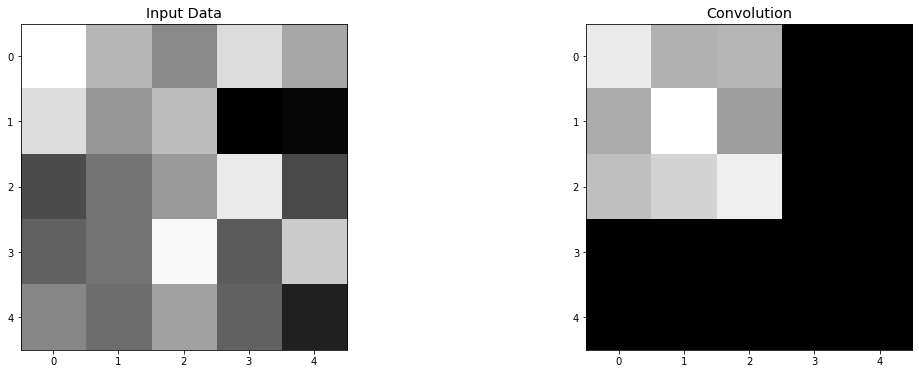

In [ ]:
implot2(im, result)

In [ ]:
# takes two inputs: image and kernel and produces the convolved image
def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)
    
    for ii in range(image.shape[0] - kernel.shape[0] + 1):
        for jj in range(image.shape[1] - kernel.shape[1] + 1):
            result[ii, jj] = np.sum(image[ii:ii + kernel.shape[0], 
                                          jj:jj + kernel.shape[1]] * kernel)

    return result

In [ ]:
im = np.random.random((50, 50))

In [ ]:
c = convolution(im, kernel)

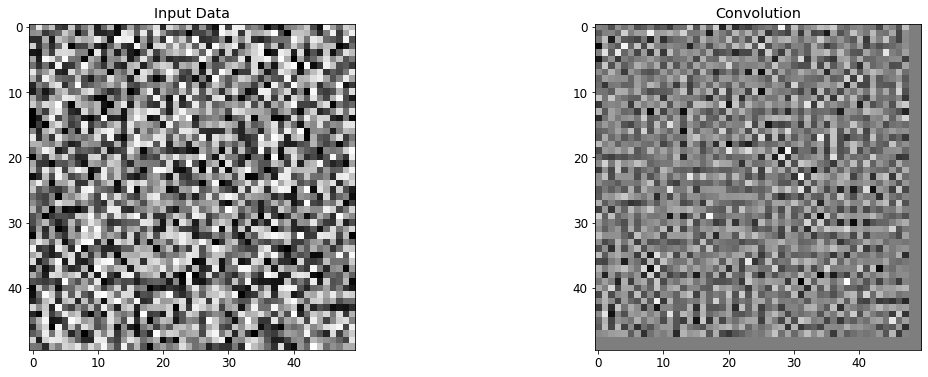

In [ ]:
implot2(im, c)



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



